In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import colorsys
from matplotlib import cm, colors
from adjustText import adjust_text
import pandas as pd

FICTION = 0
assert not FICTION, "we don't do that anymore"
CANON = 1
if FICTION:
    fname = 'merged_fiction.csv'
elif not CANON:
    fname = 'merged_nocanon.csv'
else:
    fname = 'merged.csv'
df = pd.read_csv(fname)
first_cols = ['token', 'total']
cols = df.columns.tolist()
reordered = first_cols + [col for col in cols if col not in first_cols]
df = df[reordered]

style = 'fivethirtyeight'
plt.style.use(style)

In [2]:
rows_per_token = df.groupby('token').size()
rpt = rows_per_token
assert len(rpt[rpt > 1]) == 0

In [3]:
# Top tokens

In [4]:
df = df.sort_values(by='total', ascending=False)
df['rank'] = range(1, len(df)+1)

In [5]:
from IPython.display import display
if 0:
    with pd.option_context('display.max_rows', None):
        x = df.sort_values(by='total', ascending=False).head(100)
        x = x.copy()
        #x['rank'] = range(1, len(x)+1)
        cols = ['rank', 'token', 'total', 'raw_total', 'mean_yr', 'median_yr', 'mode_yr', 'total_pre1900', 
                'total_20c', 'total_21c', 'cat']
        display(
            x[cols]
        )

In [6]:
## Top tokens (raw counts)

In [7]:
n = 25
if 0:
    with pd.option_context('display.max_rows', None):
        x = df.sort_values(by='raw_total', ascending=False).head(n)
        x = x.copy()
        x['rank'] = range(1, len(x)+1)
        cols = ['rank', 'token', 'total', 'raw_total', 'mean_yr', 'median_yr', 'mode_yr', 'total_pre1900', 
                'total_20c', 'total_21c', 'cat']
        display(
            x[cols]
        )

In [8]:
n = 22
tops = []
x = df.sort_values(by='total', ascending=False).head(n)
tops.append(x['token'])

In [9]:
x = df.sort_values(by='total_pre1900', ascending=False).head(n)
tops.append(x['token'])

In [10]:
x = df.sort_values(by='total_20c', ascending=False).head(n)
tops.append(x['token'])

In [11]:
x = df.sort_values(by='total_21c', ascending=False).head(n)
tops.append(x['token'])

In [12]:
## Summary leaderboard

In [13]:
import numpy as np
tops = np.array(tops)
cols = ['pre_1900', '20c', '21c']
lboard = pd.DataFrame(tops[1:].T, columns=cols)
if 0:
    lboard

In [14]:
## Mirrored bars

In [15]:
def plot_sizeof(xticks=False):
    n = 22
    FS = (12, 10)
    barheight = .6
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=FS)

    def get_area(ax, rects):
        area = 0
        for rect in rects:
            bb = rect.get_bbox()
            bba = ax.transData.transform_bbox(bb)
            # For some reason, bars going right-to-left will have -ve width.
            rect_area = abs(np.product(bba.size))
            area += rect_area
        return area

    col2 = 'total_21c'
    d2 = df\
        .sort_values(by=col2, ascending=False).head(n)\
        .sort_values(by=col2)\
        .copy()

    col1 = 'total_pre1900'
    d1 = df\
        .sort_values(by=col1, ascending=False).head(n)\
        .sort_values(by=col1)\
        .copy()

    dac = [[d1, ax1, col1], [d2, ax2, col2]]

    peryear = 1
    if peryear:
        nyears = [100, 9]
        for ((d, a, c), ny) in zip(dac, nyears):
            d[c] = d[c] / ny / 10

    token_to_color = dict(
        #pea = 'g',
        pea = '#78e37d',
        #walnut = 'saddlebrown',
        walnut = '#e2b869',
        #egg = 'peru',
        egg = '#e5e2a4',
        #orange = 'darkorange',
        orange = '#ffb375',
        man = 'thistle',
        #pinhead = 'powderblue',
        pinhead = '#9ec2c2',
    )
    defaultcolor = 'darkgrey'
    for d in [d1, d2]:
        d['color'] = defaultcolor
        for tok, color in token_to_color.items():
            d.loc[d['token']==tok, 'color'] = color

    rs = []
    for (d, ax, col) in dac:
        r = ax.barh(range(n), d[col], barheight, tick_label=d['token'], color=d['color'])
        rs.append(r)

    #ax1.set_xlim(ax1.get_xlim()[::-1]);
    ax1.invert_xaxis();
    ax1.yaxis.tick_right()

    for ax in [ax1, ax2]:
        ax.set_ylabel('')
        #ax.tick_params(axis='y', which='major', labelsize=8)
        ax.autoscale(axis='y', tight=True)
        if not xticks:
            ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

    # increase xlim of ax2, so net effect is moreso that pea is smaller, rather than everything
    # else being bigger? i.e. keep the avg. bar height about the same between the two.
    ax2.set_xlim(right=d2[col2].max() * 2.12)


    t1 = '1800-1899'
    t2 = '2000-2008'
    if 0:
        ax1.set_title(t1)
        ax2.set_title(t2)
    else:
        ty = .6
        kwargs = dict(bbox=dict(facecolor='khaki', alpha=1))
        ax1.text(.1, ty, t1,
                 transform=ax1.transAxes,
                 fontsize=21,
                 **kwargs
        )
        ax2.text(.5, ty, t2,
                 transform=ax2.transAxes,
                 fontsize=21,
                 **kwargs
        )

    
    fn = 'FreeSerif'
    title_y = .97
    sub_y = .87
    subplot_y = .82
    fig.suptitle("The Size of Things", y=title_y, fontsize=36, 
                 fontweight='bold', 
                 fontname=fn,
                )
    sub = '''The most common objects used in analogies of the form "the size of a _____" in English books.'''
    fig.text(.5, sub_y, sub, horizontalalignment='center',
             #fontname=fn,
            )

    footnote = 'source: books.google.com/ngrams'
    fig.text(.7, .02, footnote, fontsize=14)
    # TODO: twitter handle / link to blogue?

    fig.tight_layout();
    plt.subplots_adjust(top=subplot_y, bottom=.05)

    if 0:
        for r, ax in zip(rs, [ax1, ax2]):
            print 'Total bar area = {:.1f}'.format(get_area(ax, r))
    return fig, (ax1, ax2)

#plot_sizeof();

In [16]:
# Size of things

In [17]:
"""
> Mr. Wigsby produced a cauliflower somewhat larger than a chaise-umbrella

> "If you please — very little — oh ! plenty, thank you " (a bit about the size of a walnut put upon the plate)

> a bouquet, the size of a prize cauliflower in his buttonhole

> You don't mean to say you cannot call him up before you, sitting, with his attendant woman, at his potter's wheel - a disc about the size of a dinner-plate

> Sticking on the forehead of the other, by invisible means, was a massive cameo, in size and shape like the raspberry tart which is ordinarily sold for a penny
""";

As an author, how do you communicate the size of an object? You probably compare it to some other thing the reader is likely to be familiar with. Take these descriptions of objects from Charles Dickens:

> a cauliflower somewhat larger than a chaise-umbrella

> a bit about the size of a walnut put upon the plate

> a bouquet, the size of a prize cauliflower in his buttonhole

> his potter's wheel - a disc about the size of a dinner-plate

> a massive cameo, in size and shape like the raspberry tart which is ordinarily sold for a penny

The objects that people formed comparisons with during a given time period provide an interesting window into what everyday objects they had on their minds, and what they treated as common knowledge. "the raspberry tart which is ordinarily sold for a penny" would be a pretty unhelpful reference for a modern reader, just as comparisons to credit cards or phone booths would be useless to a reader from 1844.

I used [Google Books' Ngram dataset](https://books.google.com/ngrams) to find the most popular size analogies in English books, and how they've changed from 1800 to today. In this post, I'll explore a few interesting examples of analogies that have gone in or out of fashion, and what kinds of cultural, historical, or linguistic changes they might reveal.

So what do authors most frequently reach for when describing the size of things? Here are the overall top 20, ranked by total number of occurences in books between 1800 and 2008.

In [18]:
fig, axes = plot_sizeof()
fig.savefig('sizeofthings.png')
plt.close(fig);

In [19]:
# with axis labels
def plot_sizeof_labeled(toscale=False):
    fig, (ax1, ax2) = plot_sizeof(xticks=1)
    
    if toscale:
        a, b = ax1.get_xlim()
        ax2.set_xlim(right=a)
    
    plt.subplots_adjust(bottom=.09)
    
    # Well actually per billion words, but this is easier to grasp
    xlabel = 'Occurrences per thousand books'
    #ax1.set_xlabel(xlabel)
    fig.text(.5, .045, xlabel, horizontalalignment='center', family='monospace');

    # Don't show 0 xticks
    for ax in [ax1, ax2]:
        ticks = ax.get_xticks()
        ax.set_xticks([tick for tick in ticks if tick != 0])

        for tick in ax.get_xticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('monospace')
    return fig, (ax1, ax2)
    
    
    
fig, (ax1, ax2) = plot_sizeof_labeled()

fig.savefig('sizeofthings_labeled.png')
plt.close(fig);

In [20]:
# axis labels and same scale
fig, (ax1, ax2) = plot_sizeof_labeled(1)

a, b = ax1.get_xlim()
ax2.set_xlim(right=a);


fig.savefig('sizeofthings_labeled_toscale.png')
plt.close(fig);

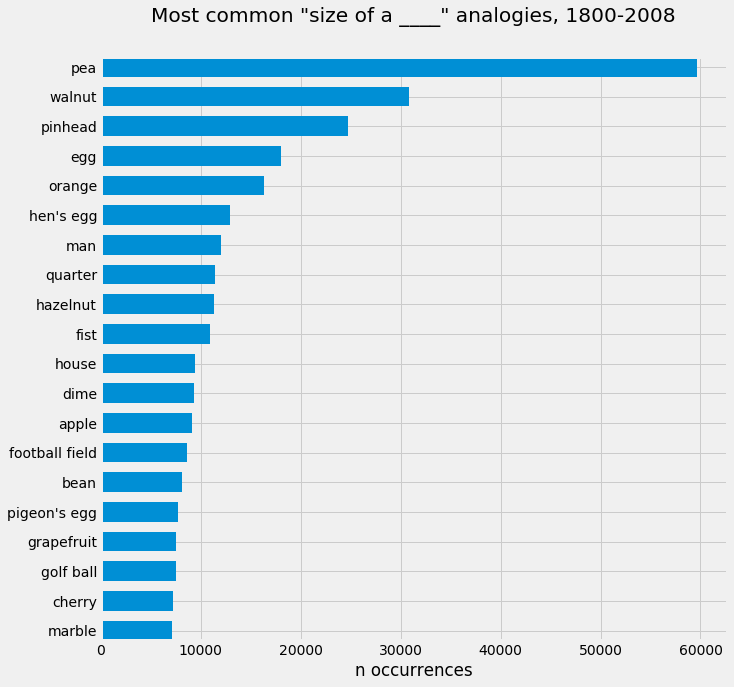

In [21]:
n = 20
FS = (10, 10)
d = df\
    .sort_values(by='raw_total', ascending=False).head(n)\
    .sort_values(by='raw_total')

#d.plot.barh(x='token', y='raw_total', figsize=FS);
#with plt.style.context('fivethirtyeight'):
fig, ax = plt.subplots(figsize=FS)
barheight = 0.66
ax.barh(range(n), d['raw_total'], barheight, tick_label=d['token'])
ax.autoscale(axis='y', tight=True)
ax.set_title('Most common "size of a ____" analogies, 1800-2008', y=1.05)
ax.set_xlabel('n occurrences');


(As noted in the heading, I restricted my analysis to comparisons taking the form `"the size of a _____"`. For all the gory technical details, check out the appendix at the end.)

Peas seem to be the undisputed champion of size analogies.

<!-- "the size of a pinhead" is pretty hoary, but other than that, the list is actually pretty short on clichés. The ultimate groaner, the breadbox, doesn't even quite make the top 1000. -->

Because the number of books published per year has increased over time, this ranking will tend to favour terms that have been popular in recent years. So for the rest of this post, I'll be normalizing by the amount of text scanned in each year.

Let's look at the top terms for the 19th, 20th, and 21st centuries to get a sense of what's changed over time.

In [22]:
cols = ['pre_1900', '20c', '21c']
# [1:] to cut out the 'overall' column
lboard = pd.DataFrame(tops[1:].T, columns=cols, index=range(1, tops.shape[1]+1))

from collections import Counter
import seaborn as sns
toks = lboard.values.flatten()
counts = Counter(toks)
dupes = [tok for tok, count in counts.iteritems() if count > 1]
dupes.sort()
def swap(a, b):
    if isinstance(a, basestring):
        a = dupes.index(a)
        b = dupes.index(b)
    dupes[a], dupes[b] = dupes[b], dupes[a]
swap(2, 16)
swap(1, 9)
swap('nut', 'quarter')

s = .8
l = .86
n = len(dupes)
cmap = sns.husl_palette(n, s=s, l=l)
cmap = cmap.as_hex()


tok_to_color = {}
century_colors = ['#aabb00', '#00aabb', '#bb00aa']
for col, color in zip(['pre_1900', '20c', '21c'], century_colors):
    for tok in lboard[col].values:
        tok_to_color.setdefault(tok, color)


g = .95
default_color = (g,g,g)
    
def color_dupes(tok):
    if 0:
        try:
            i = dupes.index(tok)
        except ValueError:
            color = default_color
            hex = colors.to_hex(color)        
        else:
            hex = cmap[i]
    else:
        hex = tok_to_color[tok]
    attr = 'background-color'
    return '{}: {}'.format(attr, hex)

#lboard
#lboard.style.applymap(color_dupes)

In [23]:
cols = ['pre_1900', '20c', '21c']
# [1:] to cut out the 'overall' column
lboard = pd.DataFrame(tops[1:].T, columns=cols, index=range(1, tops.shape[1]+1))

from collections import Counter, defaultdict
import seaborn as sns
toks = lboard.values.flatten()
counts = Counter(toks)
dupes = [tok for tok, count in counts.iteritems() if count > 1]
dupes.sort()
def swap(a, b):
    if isinstance(a, basestring):
        a = dupes.index(a)
        b = dupes.index(b)
    dupes[a], dupes[b] = dupes[b], dupes[a]
swap(2, 16)
swap(1, 9)
swap('nut', 'quarter')

s = .8
l = .86
n = len(dupes)
cmap = sns.husl_palette(n, s=s, l=l)
cmap = cmap.as_hex()


g = .95
default_color = (g,g,g)
tok_to_color = defaultdict(lambda: colors.to_hex(default_color))
#century_colors = ['#aabb00', '#00aabb', '#bb00aa']
pal = sns.color_palette("Set3", 3).as_hex()
for i, col in enumerate(['pre_1900', '20c']):
    for tok in lboard[col].values:
        c = counts[tok]
        if c == 1:
            continue
        elif c == 3:
            color = pal[2]
        else:
            color = pal[i]
        tok_to_color.setdefault(tok, color)


g = .95
default_color = (g,g,g)
    
def color_dupes(tok):
    if 0:
        try:
            i = dupes.index(tok)
        except ValueError:
            color = default_color
            hex = colors.to_hex(color)        
        else:
            hex = cmap[i]
    else:
        hex = tok_to_color[tok]
    attr = 'background-color'
    return '{}: {}'.format(attr, hex)

#lboard

lboard = lboard.rename(columns={
    'pre_1900': "1800s",
    '20c': "1900s",
    '21c': "2000s",
})

lboard.style.applymap(color_dupes)

,1800s,1900s,2000s
1,pea,pea,pea
2,walnut,walnut,walnut
3,pinhead,pinhead,quarter
4,egg,egg,football field
5,hen's egg,orange,egg
6,orange,hen's egg,grapefruit
7,hazelnut,hazelnut,house
8,pigeon's egg,man,golf ball
9,shilling,fist,man
10,nut,bean,fist


(Terms are coloured according to the subset of centuries in which they chart.)

"the size of a pea" is consistently the number 1 size comparison from 1800 to present day. Eggs and walnuts also remain consistently popular, but beyond those examples, there's a lot of change from century to century.

Some differences have obvious historical reasons. For example, the shilling was out of circulation by the dawn of the millenium, and credit cards didn't exist in the 19th century. But most are less obvious. Why have we gradually forgetten how big pigeon eggs are? Why is a deck of cards such a distinctly modern point of reference?

Let's dig into some trends and a few specific curiosities.

### Down with nature

One general trend that stands out is a drop over time in references to 'natural' objects.

In [24]:
natural = ("pea,walnut,egg,hen's egg,orange,hazelnut,pigeon's egg,nut,cherry,bean,apple,pigeon,goose,"
    "nutmeg,millet seed,cat,grapefruit").split(',')
def color_natural(tok):
    if tok not in natural:
        return ''
    if 0 and tok == "pigeon's egg":
        c = '#6cb28e'
    else:
        c = '#9fe0be'
    return 'background-color: {}'.format(c)

#lboard
lboard.style.applymap(color_natural)

,1800s,1900s,2000s
1,pea,pea,pea
2,walnut,walnut,walnut
3,pinhead,pinhead,quarter
4,egg,egg,football field
5,hen's egg,orange,egg
6,orange,hen's egg,grapefruit
7,hazelnut,hazelnut,house
8,pigeon's egg,man,golf ball
9,shilling,fist,man
10,nut,bean,fist


16 of the top 22 terms in the 19th century refer to objects from nature (seeds, fruits, animals, nuts, eggs...), but by the 21st century there are only 5.

### Up with sports

Not a single sports analogy makes the list in the 19th and 20th centuries, but they explode onto the scene in the 21st century: 

In [25]:
sporty = "football field,golf ball,baseball,basketball,football,tennis ball".split(",")
def color_sports(tok):
    if tok not in sporty:
        return ''
    else:
        c = '#e5dea5'
    return 'background-color: {}'.format(c)

lboard.style.applymap(color_sports)

,1800s,1900s,2000s
1,pea,pea,pea
2,walnut,walnut,walnut
3,pinhead,pinhead,quarter
4,egg,egg,football field
5,hen's egg,orange,egg
6,orange,hen's egg,grapefruit
7,hazelnut,hazelnut,house
8,pigeon's egg,man,golf ball
9,shilling,fist,man
10,nut,bean,fist


Most of the referenced sports weren't invented until around the turn of the century, so it isn't surprising they didn't make the pre-1900 list. But it's not like they didn't have any sports in the 19th century. Why weren't analogies to golf balls or cricket balls popular back then?

<!-- It's tempting to connect this to the decline in plants and animals. Blah blah. -->

<!-- https://books.google.com/ngrams/graph?content=%28size+of+a+football+-+size+of+a+football+field%29%2Csize+of+a+baseball%2Csize+of+a+basketball%2Csize+of+a+golf+ball%2Csize+of+a+tennis+ball%2Csize+of+a+cricket+ball&year_start=1800&year_end=2008&corpus=15&smoothing=20&share=&direct_url=t1%3B%2C%28size%20of%20a%20football%20-%20size%20of%20a%20football%20field%29%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20baseball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20basketball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20golf%20ball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20tennis%20ball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20cricket%20ball%3B%2Cc0 -->

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=%28size+of+a+football+-+size+of+a+football+field%29%2Csize+of+a+baseball%2Csize+of+a+basketball%2Csize+of+a+golf+ball%2Csize+of+a+tennis+ball%2Csize+of+a+cricket+ball&year_start=1800&year_end=2008&corpus=15&smoothing=20&share=&direct_url=t1%3B%2C%28size%20of%20a%20football%20-%20size%20of%20a%20football%20field%29%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20baseball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20basketball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20golf%20ball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20tennis%20ball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20cricket%20ball%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

This provides circumstantial evidence that people in the English-speaking world are at least thinking about sports a lot more than they did 1 or 2 generations ago. If that's true, is it being driven by increases in leisure time allowing more people to play? Or advances in mass media that have made it easier to watch professional sports? That sounds like a question for a sociologist.

### The decline of pigeon eggs

Pigeon eggs were an astonishingly common benchmark for comparisons in the 19th century, ranking 8th (with "size of a pigeon" at number 15). But they experienced a sharp drop in the late 19th century and a gradual decline thereafter.

<img src="pigeonsegg.png" />

Why was everyone familiar with the size of pigeon eggs in the 1800's? I've lived in cities with lots of pigeons and never seen one of their eggs. 

If you're skeptical, you can browse some examples from Google Books [here](https://www.google.ca/search?q=%22size+of+a+pigeon%27s%22&tbm=bks&lr=lang_en&gws_rd=cr&dcr=0&ei=ACLyWZqTNMbejwTiqaEQ). It's not that this time period has an extraordinary number of books on ornithology. The comparison occurs frequently in technical texts on areas like medicine, botany and geology. But it also occurs in books aimed at non-technical audiences (e.g. [a Jules Verne novel](https://books.google.ca/books?id=TMqzAwAAQBAJ&pg=PT101&dq=%22size+of+a+pigeon%27s%22&hl=en&sa=X&ved=0ahUKEwi5tfql7o7XAhUK6IMKHfIuCqg4ggEQ6AEITjAH#v=onepage&q=%22size%20of%20a%20pigeon's%22&f=false), or [The Practice of Cookery: Adapted to the Business of Every Day Life](https://books.google.ca/books?id=y6N2cnCzajUC&pg=PA477&dq=%22size+of+a+pigeon%27s%22&hl=en&sa=X&ved=0ahUKEwiw_buR7o7XAhUl3YMKHdpsCJ84WhDoAQgsMAE#v=onepage&q=%22size%20of%20a%20pigeon's%22&f=false) by one "Mrs. Dalgairns").

This was hugely baffling to me, until I remembered [that *other* pigeon](https://en.wikipedia.org/wiki/Passenger_pigeon).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Passenger_pigeon_shoot.jpg/640px-Passenger_pigeon_shoot.jpg" />

Passenger pigeons were once the most abundant bird in North America - flocks (like the one illustrated above) were described as blocking out the sun. The [wiki article](https://en.wikipedia.org/wiki/Passenger_pigeon) is full of vivid descriptions of their abundance and the extravagance with which they were hunted:

> Passenger pigeons were shot with such ease that many did not consider them to be a game bird, as an amateur hunter could easily bring down six with one shotgun blast; a particularly good shot with both barrels of a shotgun at a roost could kill 61 birds.

> The pigeon was considered so numerous that 30,000 birds had to be killed to claim the prize in one competition.

And this particularly relevant one regarding nesting sites:

> Nearly every tree capable of supporting nests had them, often more than 50 per tree; one hemlock was recorded as holding 317 nests.

Of course, their story doesn't have a happy ending. As a result of overhunting and deforestation, by the 1870's their numbers had noticeably declined, and they were virtually extinct in the wild by the 1890's. Concurrently, "size of a pigeon's egg" analogies began their own slow march toward extinction.

<!-- size of a hen's egg -->

### The size of a nutmeg?

This one is pretty baffling.

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+nutmeg&year_start=1800&year_end=2008&corpus=15&smoothing=5&share=&direct_url=t1%3B%2Csize%20of%20a%20nutmeg%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

This is consistent with the general observation that terms from nature have declined over time. We generally spend less time making food than our ancestors did, so nuts and spices are less likely to be at the forefront of our minds than golf balls and quarters. But this dramatic, steep decline isn't experienced by walnuts or hazelnuts or even the relatively obscure millet seed.

Another curious aspect here is that nutmeg is treated as a count noun ("a nutmeg") rather than a mass noun ("some nutmeg", "a teaspoon of nutmeg"). To my ear, this sounds utterly bizarre, though it seems like it's not entirely archaic. <!-- When referring to the hard spherical things you grate to get nutmeg, the [Wikipedia article](https://en.wikipedia.org/wiki/Nutmeg) alternates between "nutmegs" and "nutmeg seeds".--><!--("size of a nutmeg seed" doesn't even appear in the Google ngram data, meaning it hasn't reached the threshold of 40 occurences. "size of a nutmeg" appears 4,500 times) --> The [Corpus of Contemporary American English](https://corpus.byu.edu/coca/) turns up 8 hits each for "a nutmeg" and "nutmegs" (vs. 1700 for "nutmeg"). For example, this passage from a [2012 Washington Post article](https://www.washingtonpost.com/lifestyle/food/pie-a-la-mcdermott-mode-or-how-to-know-when-dessert-is-done/2012/07/09/gJQAZnp9aW_story.html):

> Important additions: a squeeze of lemon juice and two — no more — Microplaned swipes of a nutmeg. Those go into every fruit pie, she says.

Or this exchange from a 2001 episode of the Oprah Winfrey Show (condensed to remove some crosstalk):

> WINFREY: OK. What are you doing?  
> Ms-KOSTYRA: I'm grating a nutmeg. The two most popular flavorings for apple pie are cinnamon, nutmeg.  
> WINFREY: And you can grate it. I thought you bought it in a little jar that -- that you -- that...  
> Ms-KOSTYRA: Well, it's fresh.  
> WINFREY: You can buy fresh nutmeg?  

This actually speaks to how unhelpful "it was the size of a nutmeg" might be today. Oprah is used to buying jars of grated nutmeg. She, and many others, might not even know what a whole nutmeg seed looks like. Maybe the sale of grated nutmeg killed "size of a nutmeg" analogies? (Though I suspect the reality is more complicated.)

(An unrelated but delightful discovery: the Oxford English Dictionary lists "nutmegs" as obsolete slang for testicles and offers this as the origin of the slang "nuts". The earliest quotation it offers, "I'll immediately whip out your nutmegs, he cry'd" comes from a bawdy 1690 song, [The Lancashire Cuckold: OR, THE Country Parish-Clark betrayd by a Conjurers Inchanted Chamber-pot.](https://ebba.english.ucsb.edu/ballad/31958/xml))

### Pencils and lead pencils

"pencil" charts only in the 21st century. It's preceded by the curious "lead pencil" which peaked in popularity in the early 20th century.

<!-- size of a pencil,size of a lead pencil -->
<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+pencil%2Csize+of+a+lead+pencil&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20pencil%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20lead%20pencil%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

What gives? It turns out that ["pencil"](https://en.wiktionary.org/wiki/pencil#Noun) used to refer to a small, fine paintbrush used for writing. The writing tool we're familiar with today was originally termed a "lead pencil" because of its similar appearance and purpose. As this new tool gained popularity, the name was shortened and the original pencil faded from memory.


Before the popularization of lead pencils, goose quills may have filled a similar niche (in analogies as in reality).

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+pencil%2Csize+of+a+lead+pencil%2Csize+of+a+goose+quill&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20pencil%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20lead%20pencil%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20goose%20quill%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

### The modernity of decks of cards

Here's a graph that I found pretty surprising:

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=deck+of+cards&year_start=1800&year_end=2008&corpus=15&smoothing=5&share=&direct_url=t1%3B%2Cdeck%20of%20cards%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

Playing cards have been around for ages, but referring to collections of them as 'decks' seems to be a distinctly 20th century (late 20th-century, even) habit. Before that, 'pack' was the standard nomenclature:

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=deck+of+cards%2Cpack+of+cards&year_start=1800&year_end=2008&corpus=15&smoothing=5&share=&direct_url=t1%3B%2Cdeck%20of%20cards%3B%2Cc0%3B.t1%3B%2Cpack%20of%20cards%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>


Though actually, the story has some more wrinkles than that. 'Deck of cards' has a long history, and was in fact popular in Early Modern English (far enough back that Google Books ngrams has spotty coverage). Here's an example from Shakespeare's *King Henry VI*:

> But, whiles he thought to steal the single ten,  
> The king was slily finger'd from the deck!

But at some point this usage fell out of favour and drifted into obscurity. An [1826 edition](https://books.google.ca/books?id=RCA4AQAAMAAJ&dq=%22of%20cards%22&pg=PA557#v=onepage&q&f=false) of the play has the following footnote explaining the above passage:

> A pack of cards was anciently termed *a deck of cards*, or *a pair of cards*, and this is still in use in some parts.

A similar explanation is given in 1886's [A Glossary of Obscure Words and Phrases in the Writings of Shakspeare and His Contemporaries ...](https://archive.org/details/aglossaryobscur00mackgoog), so the phrase must have remained obscure to a common audience until at least the late 19th century.

(And yes, you read that footnote right. At some time, in some place, people thought it was a fine idea to call a collection of 52 cards "a pair of cards". According to the OED, this usage still exists today "Now chiefly Brit. regional and Irish English (north.)")

<br/>

That concludes our survey of weird trends in size analogies. I hope you enjoyed it. If you're interested in some of the technical details of how I performed this analysis, feel free to read on. The code used for this analysis is available on GitHub [here](https://github.com/colinmorris/size-of-an-x). That repo includes a [csv file](https://github.com/colinmorris/size-of-an-x/blob/master/sizeofthings.csv) with stats on around 4,000 "size of a..." phrases, if you're interested in investigating some more obscure size analogies.

## Appendix: Methodology

For this analysis I used the most recent English [Google Books ngram data](https://books.google.com/ngrams/datasets). I downloaded all 4-grams and 5-grams beginning with 'si' and grepped for `size of an? *`.

Below are a few details and caveats are worth mentioning.

### Non-figurative phrases

Sometimes "the size of an X" is an actual object of discussion, e.g.:

> Excessive magnification of the size of an image can make it difficult to recognize what real object it represents.

Fortunately, there is a pretty clean division between objects that are used in those contexts, and objects used for comparison. There are very few earnest discussions of the size of a pea or the size of a pin's head. And images, networks, and families are rarely referenced when making size comparisons.

I manually curated a list of objects that are mostly used non-figuratively, and excluded them from the analysis. Most of them are computer terms (object, image, partition, array...). The only phrase listed in the high-score table above having a non-trivial proportion of non-figurative uses is "house" (my back-of-the-envelope estimate is that around 10% of "size of a house"s are non-figurative).

### 4-grams, 5-grams and disambiguation

You may notice that some objects are unigrams (single words like "pea") and some are bigrams (two-word phrases like "football field").

I used 4-gram data ("size of a X") as a starting point to get unigram counts for different values of X, and extended the results as necessary using 5-grams ("size of a X Y").

Some tokens were partially extended. For example, "football" followed by any of "field", "pitch", "player", or "stadium" were each treated as distinct objects. The remaining counts for "size of a football" (after subtracting the counts for "size of a football field" etc.) went to the "football" object.

If a token could not stand alone as an object, it was fully split. For example, "the size of a tea" is not a meaningful phrase, so I ignored the count for the "tea" unigram, and separately counted all bigrams beginning with "tea" (tea chests, tea plates, tea saucers, tea trays...).

In some cases, even a bigram couldn't stand alone as a meaningful object - e.g. "deck of". In most cases, there was a unique larger phrase that the bigram unambiguously prefixed (e.g. "deck of cards" in the previous example). Where possible, I filled in these completions transparently.

In a few rare cases, the completion was ambiguous. The two most common bigrams with this problem were "grain of" and "man's" (in the Google Books ngram data, this is tokenized as `["man", "'s"]`). I applied a quick hack to patch up these two cases. I looked at 5-grams matching "as a man 's X" and "as a grain of X" to calculate the distribution of completions. I then divided the bigram counts for "man's" and "grain of" into trigrams according to the distribution of those completions. (e.g. if 50% of X's were "mustard" in "as a grain of X" in 1958, and "size of a grain of" had 800 appearances in 1958, "size of a grain of mustard" would be recorded with 400 appearances in 1958).

### Orthographic variations

I merged together the counts for minor orthographic variations of the same phrase. For example, "a pin's head", "a pin head", and "a pinhead". Though not the focus of my analysis, the changes in spelling of a term over time can occasionally be quite dramatic:

<img src="/pinheads.png" />

I didn't merge significantly different surface realizations of the same object, e.g. {"an egg", "a hen's egg"}, or {"a hazelnut", "a filbert"}.

I curated a small set of common, innocuous adjectives like "small", "large", "ordinary", "standard". I merged counts for bigrams matching "&lt;adjective&gt; X" into X - e.g. the counts for "the size of an ordinary apple" are counted under "apple".

Without these merging heuristics, the results are not appreciably different. One interesting feature of the ranking of 'raw' terms: such is the primacy of peas that they would appear 3 times in the top 20: 1. pea, 12. small pea, 18. large pea.

### Normalization

As mentioned earlier, later years have more scanned books, so measuring a phrase's popularity by its raw counts will tend to put a disproportionate weight on recent years. It would be nice to come up with a metric that doesn't have this problem, but that turns out to be surprisingly difficult.

The most obvious solution (and the one used in the [Ngram Viewer](https://books.google.com/ngrams) charts) is to normalize each year's counts by the number of words scanned in that year. i.e. what % of all n-grams in a given year are "size of a goose" or whatever. This was in fact the solution I used, but there's a subtle problem with it.

Here are the most common analogies from the 19th and 21st centuries, with their relative frequency plotted on the same scale:

<img src="/sizeofthings_labeled_toscale.png" />

The most common analogies in the 19th century are far more frequent than those in the 21st century. It's not that the latter has a flatter distribution - i.e. a greater diversity of analogies. As a whole, there are far fewer "size of a" analogies per page in the 21st century than in the 19th.

One reason for this could be shifting genre distributions. Some genres, like fiction, or technical writing on natural history or medicine tend to have lots of size analogies ("patient presented with a tumour the size of a golf ball"). Books about tax law, psychology, or algebra are unlikely to do much describing of the sizes of objects. 

If "size of a pea" is .001% of 4-grams in 1900 and .0005% of 4-grams in 2000, we might conclude that peas became a less popular size reference in that time span. But if 1900 has twice as many size analogies per page as 2000, then our conclusion is spurious - of the times people compared the size of something to something else, they chose peas as that something else the same % of the time in 1900 as in 2000.

One solution to *that* problem would be to normalize by the total counts of "size of a(n)" per year. The problem with this is that, as noted earlier, not all occurences of that phrase correspond to size analogies. And recent years have a much higher rate of non-figurative phrases ("the size of a file", "the size of a disk", "the size of an array").

Another solution is to fix a single genre. Google offers an 'English fiction' version of the ngram dataset.

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+walnut%3Aeng_fiction_2012%2Csize+of+a+walnut%3Aeng_2012&year_start=1800&year_end=2008&corpus=16&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20walnut%3Aeng_fiction_2012%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20walnut%3Aeng_2012%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

Whereas the default corpus of all books gives the impression that walnut analogies have dropped over time, they've remained pretty flat in the fiction corpus (which is probably closer to the reality we're trying to capture, since walnuts been consistently the second-most popular analogy in each of the 19th, 20th, and 21st centuries).

Unfortunately, while fiction is about 25% of the dataset in recent years, until the late 20th century, it comprises quite a small proportion of books scanned per year.

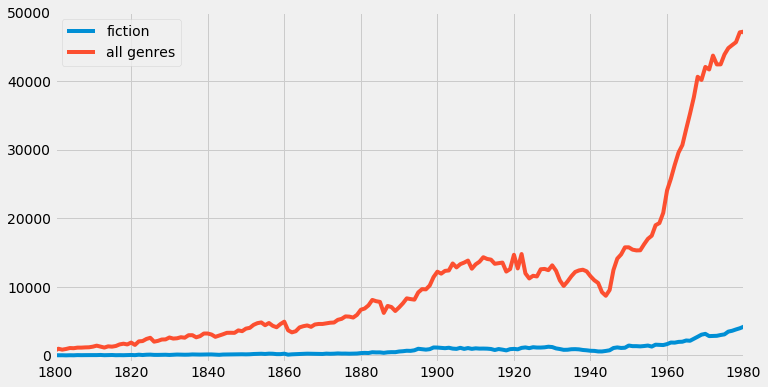

In [26]:
count_fname = 'totalcounts-fiction.txt'
f = open(count_fname)
nugs = f.read().split('\t')
rows = [map(int, nug.split(',')) for nug in nugs if len(nug) > 1]
cols = ['year', 'matches', 'pages', 'books']
cdf = pd.DataFrame(rows, columns=cols)
f.close()


count_fname = 'totalcounts.txt'
f = open(count_fname)
nugs = f.read().split('\t')
rows = [map(int, nug.split(',')) for nug in nugs if len(nug) > 1]
cols = ['year', 'matches', 'pages', 'books']
cdfa = pd.DataFrame(rows, columns=cols)
f.close()


FS = (11, 6)
fig, ax = plt.subplots(figsize=FS)
ax.plot(cdf['year'], cdf['books'], label='fiction')
ax.plot(cdfa['year'], cdfa['books'], label='all genres')
ax.set_xlim(left=1800, 
            #right=cdf['year'].max()
            right=1980,
            #right=1900,
           )
ax.set_ylim(bottom=-1000, top=50000)
ax.legend();

For most of the 19th century, there are just a few hundred books per year. Which is nothing to sneeze at, but insufficient to statistically analyse these kinds of linguistic needles in a haystack.

So the simplest approach to normalization is probably the least of all evils. The good news is that, whatever bias is baked into our measurement, it applies evenly to all terms. So if "deck of cards" shoots up during a time when "pack of cards" falls, we can at least be confident that the former is growing in popularity relative to the latter. But we should be a bit cautious in interpreting the shape of a single phrase's usage over time. 

### More ngram dataset caveats

Another contributor to the apparent overall decline over time of all our analogies is what Alberto Acerbi calls the "recent-trash" argument in his post about [normalization biases in Google ngram data](https://acerbialberto.com/2013/04/14/normalisation-biases-in-google-ngram/) (which is an excellent read). This is the claim that recent books have a higher ratio of junk (data, formulas, special characters) to 'real' words or sentences, which leads to an overall bias toward declining frequency for legitimate words and phrases.

[This paper](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0137041) makes a couple interesting arguments for why we should be skeptical of cultural or linguistic trends inferred from the dataset:

1. It imposes a sort of false democracy by counting each book equally, regardless of its popularity. A hack writer churning out reams of obscure pulp fiction could have an outsized influence. The impact of a term from a single widely-read book or series (e.g. "Frodo") could be underestimated.
2. An increase in the proportion of academic articles in recent years, creating trends toward academic language not reflective of general usage. (Though not a part of the paper's claims, this seems relevant to the recent-trash argument).

Anecdotally, I've observed something like the opposite of 1. Popular stories are reprinted, serialized, anthologized and excerpted, with the effect that each of their n-grams are counted many times over. My "size of a fine cauliflower" analogy appears 73 times between 1800 and 2008, but as far as I can tell, [every single one](https://www.google.ca/search?q=%22size+of+a+fine+cauliflower%22&tbm=bks&lr=lang_en&gws_rd=cr&dcr=0&ei=dNv0WbL9IKyPjwSFlJHYCw) is from the same sentence in Charles Dickens' [Pictures From Italy](https://en.wikipedia.org/wiki/Pictures_from_Italy).

Which leads me to another problem:

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+fine+cauliflower&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20fine%20cauliflower%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

Fine cauliflowers peaked in the mid-1800's when *Pictures From Italy* was first published, but they pop up all through the 20th century and beyond. Books are associated with their year of publication, but a story from 1846 reprinted in 2008 is not at all reflective of language use in the 2000's.

I haven't made any attempt to estimate the size of these effects (but it'd be an interesting experiment to try!).

<br/>